#  Job Salary Prediction

> a) Carge los datos *csv* de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de *pandas*. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto?  

In [1]:
import pandas as pd
df = pd.read_csv("Train_rev1.csv")
df = df[:10000]
df_train = df.iloc[:-1000]
df_val = df.iloc[-1000:]
...#load other sets
df_train.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


Las las columnas del dataset se describen como el "cargo", "descripción", "una localidad", "localidad normalizada", "el tipo de contrato", "tiempo del contrato", "compañia del aviso", "salario mostrado", "salario normalizado" y la "fuente de los datos".

A continuación se muestran las cantidades de datos para cada conjunto data frame

In [2]:
df.shape,  df_train.shape, df_val.shape

((10000, 12), (9000, 12), (1000, 12))

A continuación se presentan la forma en que se distribuyen las variables discretas mediante gráficos y datos descriptivos de las variables.

In [3]:
import matplotlib.pyplot as plt
data2 = df['SalaryNormalized']
maximo = df['SalaryNormalized'].max()
plt.hist(data2, 4, (0,maximo) )

(array([8297., 1614.,   78.,   11.]),
 array([     0.,  43200.,  86400., 129600., 172800.]),
 <a list of 4 Patch objects>)

El histograma para la distribución de salarios normalizados muestra que la mayor parte de los salarios estan entre 0 y 50.000, y aunque existen valores sobre los 150.000, son tan pocos en comparación que no se aprecian en el gráfico.

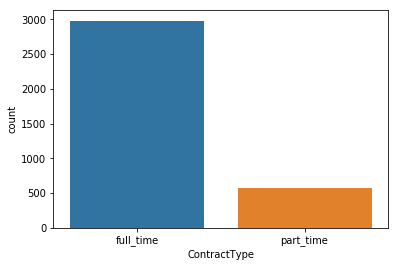

In [4]:
import seaborn as sns
%matplotlib inline
sns.countplot(x= "ContractType",data=df)

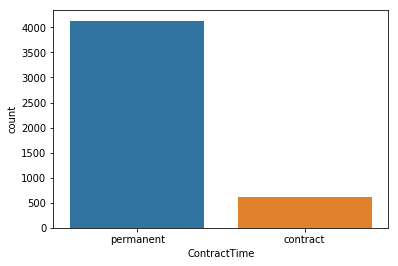

In [5]:
import seaborn as sns
%matplotlib inline
sns.countplot(x= "ContractTime",data=df)

Se observa que existe una mayor probabilidad que los contratos sean permanetes y tipos full-time.

Text(0.5,1,'Categorías de trabajos solicitados')

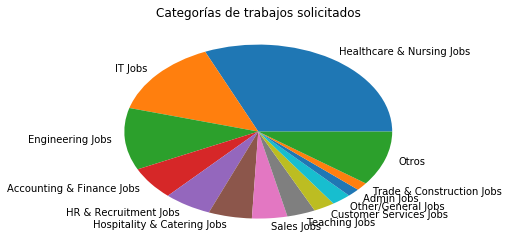

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.ion()  # Ponemos el modo interactivo

visitas = df['Category'].value_counts()[:12]
visitas = np.append(visitas,(df['Category'].value_counts()[12:]).sum())
paises = df['Category'].value_counts().keys()[:12]
paises = np.append(paises,"Otros")
plt.pie(visitas, labels = paises, )
plt.title("Categorías de trabajos solicitados")


Se observa que una gran parte de los trabajos estan concentrados en Informatica e Ingenería

El resto de las variables discretas como "LocationNormalized" tienen demasiados valores posibles por lo que un histograma no entregaría demasiada información  y resultaría engorroso, mientras que otras variables no normalizadas como "FullDescription" o "Title" llegaría incluso a ser improbable que se repitan los valores.

In [7]:
len(df['LocationRaw'].value_counts()),len(df['LocationNormalized'].value_counts()), len(df['Title'].value_counts()), len(df['FullDescription'].value_counts()), len(df['Company'].value_counts()) 

(2399, 899, 8273, 9940, 1197)

Cantidad de: "Localidades", "localidades normalizadas", "títulos",  "Descripciones", "Compañias" distintas.

> b) Extraiga los datos de cada conjunto con los que trabajará, el input XX, los textos, y el output yy, los salarios.
    
> Se extraen los textos y los salarios correspondientes al entrenamiento y al conjunto de validación.

In [83]:
text_train = df_train.FullDescription
text_val = df_val.FullDescription
salary_train = df_train.SalaryNormalized
salary_val = df_val.SalaryNormalized

>Se utiliza la función word_extractor2 para pasar el texto de "full description" a un vocabulario éstandar, se seleccionó este extractor ya que genera un vocabulario que normaliza palabras similares lo que ayuda a relacionar entradas parecidas, a continuación se genera un vector características features_train.

In [86]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor2(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

#Se normalizan los textos usando word_extractor2
a = list()
for text in text_train:
    a.append(word_extractor2(text))
auxdf = pd.DataFrame()
auxdf['text'] = a

texts_train = auxdf['text']

b = list()
for text in text_val:
    b.append(word_extractor2(text))
auxdf2 = pd.DataFrame()
auxdf2['text'] = b

texts_val = auxdf2['text']

Would you like a rewarding career within the healthcare sector? Do you enjoy providing excellent service and caring for customers? Are you an individual who understands and listens to others? Are you complemented on your energy and drive? If this sounds like you, this could be the opportunity you have been waiting for. Saga Healthcare is one of the UK's leading providers of health and social care and right now we are searching for a Branch Manager to continue the excellence within our homecare division, delivering quality care services to the local community If you have the passion to lead an established and professional team then this could be the role for you. Already recognised as a people focused, quality driven manager, you could now become part of the future of home based care. For an initial individual discussion, please call our dedicated team, who are waiting to hear from you. Contact us now on : **** **** or email careersalliedhealthcare.com Saga Healthcare Group is an equal 

 > Se uso CounterVectorizer para contar la cantidad de veces que se repite cada palabra en el vocabulario de las palabras usadas.

In [88]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#Se transforman los textos normalizados a vectores usando CountVectorizer
vectorizer_train = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_train.fit(np.asarray(texts_train))

X_train = vectorizer_train.transform(texts_train)
X_val = vectorizer_train.transform(texts_val)

#Se pasan las salidas Y a arreglo
Y_train = np.asarray(salary_train)
Y_val = np.asarray(salary_val)

X_train, X_val

(<9000x19931 sparse matrix of type '<class 'numpy.int64'>'
 	with 920307 stored elements in Compressed Sparse Row format>,
 <1000x19931 sparse matrix of type '<class 'numpy.int64'>'
 	with 103413 stored elements in Compressed Sparse Row format>)

Tambien podemos observar la cabecera del vocabulario generado por los textos ya normalizados.

In [89]:
vocab = vectorizer_train.get_feature_names()
dist = list(np.array(X_train.sum(axis=0)).reshape(-1,))
lista = list(zip(vocab, dist))
lista.sort(key=lambda x: x[1],reverse=True)
lista_ordenada = lista
lista_ordenada[:10]

[('work', 7559),
 ('experi', 7044),
 ('thi', 6705),
 ('role', 5448),
 ('pleas', 5198),
 ('team', 5129),
 ('requir', 5106),
 ('within', 4824),
 ('client', 4807),
 ('opportun', 4535)]

> d) Intente resolver el problema enfrentándolo como regresión con el modelo de regresión lineal ordinaria en *sklearn*. ¿Qué es lo que hace *fit_intercept=True*? Evalúe la función objetivo (F.O.) utilizada y la métrica de la competencia (*mean absolute error*) en ambos conjuntos generados en el punto a). Comente lo observado.

> Se usa un modelo de regresión lineal ajustándolo a los datos de entrenamiento, donde X_train a sido previamente vectorizado ajustandose a un vocabulario común, lo que tambien se aplica a los datos de evaluación X_val.

> La variable fit_intercep le dice al modelo si es que quiere que los datos se ajusten considerando el intercepto, es decir, en términos de regresión lineal si se deben ajustar a alpha, con épsilon el ruido y beta una característica.

$$Y = {\beta}X + {\alpha} + {\epsilon}$$

In [90]:
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
model.fit(X_train, Y_train)
... #measure F.O.
from sklearn.metrics import mean_absolute_error #measure MAE


In [91]:
print("Accuracy under training: ",model.score(X_train,Y_train))
print("Accuracy under validation: ",model.score(X_val,Y_val))

Accuracy under training:  0.9975452481674044
Accuracy under validation:  -41.11573771823491


In [92]:
print("MAE on train: ",mean_absolute_error(Y_train, model.predict(X_train)))
print("MAE on validation: ",mean_absolute_error(Y_val, model.predict(X_val)))

MAE on train:  85.99743045642148
MAE on validation:  85076.81506939443


> Los valores obtenidos para los datos de entrenamiento son buenos (menores a 3400) por que el modelo esta ajustado a esos datos, por lo que la predicción es similar a la salida real, no obstante para nuevos datos X_val la diferencia es mucho mayor por lo que este modelo se considera sobre ajustado a los datos.

> e) Intente mejorar sus resultados en base a la métrica de la competencia (MAE) sobre el conjunto de validación. Comente sobre lo realizado.  

> Se crea una función que genera un nuevo texto considerando solo la información relevante que esta representada en las demás columnas, por lo que se descarta la columna FullDescription, así el nuevo texto se representará como :
   
  > ( "Location" "Company" "Category" "ContractType" "ContractTyme" "Title")

In [120]:
def new_words(df_train):
    feature_train = pd.DataFrame()    
    feature_train["LocationNormalized"] = df_train["LocationNormalized"]
    feature_train["Company"] = df_train["Company"]
    feature_train["Category"] = df_train["Category"]
    feature_train["ContractType"] = df_train["ContractType"]
    feature_train["ContractTime"] = df_train["ContractTime"]
    feature_train["Title"] = df_train["Title"]
    a = list()
    
    for row in feature_train.values:        
        location  = str(row[0])
        company = str(row[1])
        category = str(row[2])
        contracttype = str(row[3])
        contracttime = str(row[4]) 
        title = str(row[5])
        texto = location+" "+company+" "+category+" "+contracttype+" "+contracttime+" "+title    
        a.append(texto)

    feature_train['NewText'] = a  
    return feature_train['NewText']

> La función entrega un vector de textos para entrenamiento y validación, con el primero se utiliza CountVectorizer para crear un vector en base al diccionario de palabras que resulta mucho menor ya que no considera palabras que no aportaban al aprendizaje contenidas en la columna "FullDescription".

In [124]:
texts_train2 = new_words(df_train)
texts_val2 = new_words(df_val)

vectorizer_train2 = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_train2.fit(np.asarray(texts_train2))

X_train2 = vectorizer_train2.transform(texts_train2)
X_val2 = vectorizer_train2.transform(texts_val2)

#Se pasan las salidas Y a arreglo
Y_train2 = np.asarray(salary_train)
Y_val2 = np.asarray(salary_val)

X_train2, X_val2

(<9000x4726 sparse matrix of type '<class 'numpy.int64'>'
 	with 95022 stored elements in Compressed Sparse Row format>,
 <1000x4726 sparse matrix of type '<class 'numpy.int64'>'
 	with 10256 stored elements in Compressed Sparse Row format>)

> Se observa que el número de dimensiones de los vectores se reducen en comparación al modelo anterior y el valor entregado es más relevante para el learner.

In [122]:
model2 = LR(fit_intercept=True, normalize=False)
model2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
print("MAE on train: ",mean_absolute_error(Y_train2, model2.predict(X_train2)))
print("MAE on validation: ",mean_absolute_error(Y_val2, model2.predict(X_val2)))

MAE on train:  3679.4236606494087
MAE on validation:  11675.13448862711


> Los valores obtenidos para el MAE son mucho menores en comparación en ambos casos, por lo que se reduce el sobreajuste anterior al considerar características relevantes.

> #  Conclusiones de esta sección
>
> Para la regresión lineal estamos utilizando muchas características para poder predecir un valor exacto Y donde cada una tiene una relevación que se asocia al valor final obtenido. Uno de los trabajos más importantes que se deben realizar para mejorar las respuestas del learner, es la correcta selección de las variables y esto implica poder reconocer aquellas que aportan contenido y pueden generar una reacción en la variable de salida, y aquellas que no se relacionas y son redundantes, por lo que se deben quitar yaque se podría "mal enseñar" al learner ajustandolo a contenido que no se relaciona con la salida.